# Question

Apply LASSO regression on the attached dataset.

About Dataset\
Hitters Case Study\
Major League Baseball Data from the 1986 and 1987 seasons.

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

What are the datatypes?\
DESCRIBE AND TRY TO FILL NA VALUES\
Apply one hot encoding and detect the outliers\
Apply OLS, ridge and lasso regression\
Which model gives the highest accuracy?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('Hitters.csv')
df

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df = df.drop('Unnamed: 0', axis=1)

## What are the datatypes?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

## DESCRIBE AND TRY TO FILL NA VALUES

In [5]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

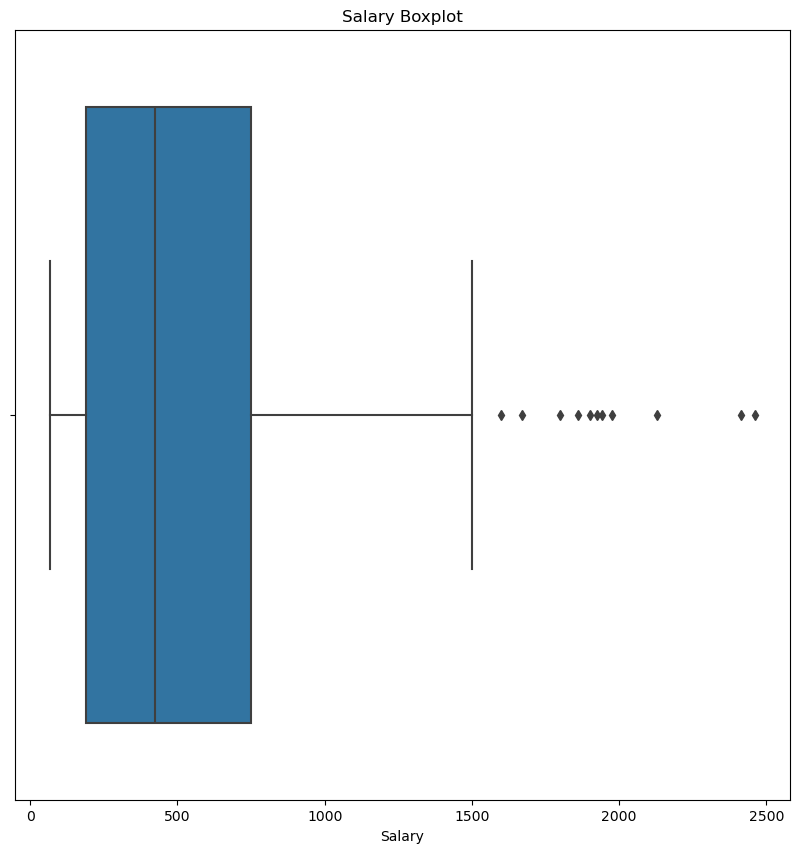

In [6]:
plt.figure(figsize=(10, 10))

sns.boxplot(x=df['Salary'])
plt.title('Salary Boxplot')
plt.show()

plt.show()

In [7]:
df['Salary'].mode()

0    750.0
Name: Salary, dtype: float64

In [8]:
df['Salary'].unique()[0] # -> Type of null value

nan

In [9]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df['Salary'] = imputer.fit_transform(df['Salary'].to_numpy().reshape(-1, 1))

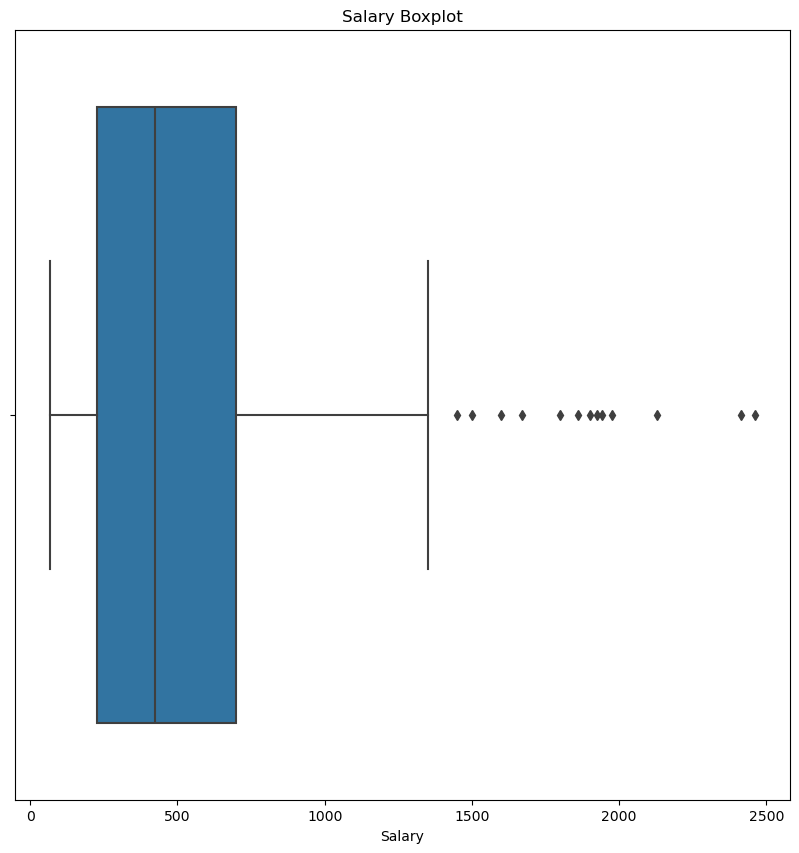

In [10]:
plt.figure(figsize=(10, 10))

sns.boxplot(x=df['Salary'])
plt.title('Salary Boxplot')
plt.show()

plt.show()

## Apply one hot encoding and detect the outliers

In [11]:
for i in df.columns:
    print(f'{i} -> {df[i].nunique()}')

AtBat -> 247
Hits -> 144
HmRun -> 36
Runs -> 96
RBI -> 103
Walks -> 89
Years -> 22
CAtBat -> 314
CHits -> 288
CHmRun -> 146
CRuns -> 261
CRBI -> 262
CWalks -> 248
League -> 2
Division -> 2
PutOuts -> 232
Assists -> 161
Errors -> 29
Salary -> 150
NewLeague -> 2


##### we can see only League, Division, NewLeague is the only categorical columns

In [12]:
for i in ['League', 'Division', 'NewLeague']:
    print(i, '->', df[i].unique())

League -> ['A' 'N']
Division -> ['E' 'W']
NewLeague -> ['A' 'N']


In [13]:
encoder = OneHotEncoder(sparse_output=False)

In [14]:
for i in ['League', 'Division', 'NewLeague']:

    temp = pd.DataFrame(

        data=encoder.fit_transform(df[i].to_numpy().reshape(-1, 1)),
        columns=encoder.get_feature_names_out([i])
    )

    df = pd.concat([df, temp], axis=1)
    df = df.drop(i, axis=1)

In [15]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,425.0,1.0,0.0,1.0,0.0,1.0,0.0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0.0,1.0,0.0,1.0,0.0,1.0
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1.0,0.0,0.0,1.0,1.0,0.0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0.0,1.0,1.0,0.0,0.0,1.0
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,0.0,1.0,1.0,0.0,0.0,1.0
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.0,1.0,0.0,1.0,0.0,1.0,0.0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,1.0,0.0,0.0,1.0,1.0,0.0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,960.0,1.0,0.0,1.0,0.0,1.0,0.0


##### Outliers removal - IQR

In [16]:
df_iqr = df.copy(deep=True)

for i in df.columns:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[i] >= lower_bound) & (df_iqr[i] <= upper_bound)]

In [17]:
df_iqr

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,425.0,1.0,0.0,1.0,0.0,1.0,0.0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0.0,1.0,0.0,1.0,0.0,1.0
6,185,37,1,23,8,21,2,214,42,1,...,76,127,7,70.0,0.0,1.0,1.0,0.0,1.0,0.0
7,298,73,0,24,24,7,3,509,108,0,...,121,283,9,100.0,1.0,0.0,0.0,1.0,1.0,0.0
8,323,81,6,26,32,8,2,341,86,6,...,143,290,19,75.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,387,124,1,67,27,36,7,1775,506,6,...,186,290,17,550.0,0.0,1.0,1.0,0.0,0.0,1.0
316,221,53,2,21,23,22,8,1063,283,15,...,325,58,6,425.0,0.0,1.0,1.0,0.0,0.0,1.0
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,0.0,1.0,1.0,0.0,0.0,1.0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,1.0,0.0,0.0,1.0,1.0,0.0


##### Outliers - Z-score

In [18]:
df_zscore = df.copy(deep=True)

for i in df.columns:

    df_zscore['z_score'] = np.abs(stats.zscore(df_zscore[i]))

    df_zscore = df_zscore[df_zscore['z_score'] < 3]

    df_zscore = df_zscore.drop('z_score', axis=1)

In [19]:
df_zscore

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,425.0,1.0,0.0,1.0,0.0,1.0,0.0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0.0,1.0,0.0,1.0,0.0,1.0
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1.0,0.0,0.0,1.0,1.0,0.0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0.0,1.0,1.0,0.0,0.0,1.0
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,221,53,2,21,23,22,8,1063,283,15,...,325,58,6,425.0,0.0,1.0,1.0,0.0,0.0,1.0
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,0.0,1.0,1.0,0.0,0.0,1.0
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.0,1.0,0.0,1.0,0.0,1.0,0.0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,1.0,0.0,0.0,1.0,1.0,0.0


In [20]:
X = df_iqr.drop('Salary', axis=1)
y = df_iqr['Salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  OLS (Linear Regression)

In [23]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
ols_predictions = ols_model.predict(X_test)

In [24]:
mae_ols = mean_absolute_error(y_test, ols_predictions)
mse_ols = mean_squared_error(y_test, ols_predictions)
rmse_ols = np.sqrt(mse_ols)
r2_ols= r2_score(y_test, ols_predictions)

print("OLS Model: ")
print(f"Mean Absolute Error (MAE): {mae_ols}")
print(f"Mean Squared Error (MSE): {mse_ols}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols}")
print(f"R^2 Score: {r2_ols}x")

OLS Model: 
Mean Absolute Error (MAE): 175.85770740421026
Mean Squared Error (MSE): 50078.210948763735
Root Mean Squared Error (RMSE): 223.78161441182726
R^2 Score: 0.4885003348538631x


## Ridge Regression

In [25]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [26]:
mae_ridge = mean_absolute_error(y_test, ridge_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, ridge_predictions)

print("Ridge Model: ")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R^2 Score: {r2_ridge}x")

Ridge Model: 
Mean Absolute Error (MAE): 175.8120417420827
Mean Squared Error (MSE): 50869.04875609212
Root Mean Squared Error (RMSE): 225.5416785343501
R^2 Score: 0.48042270456377056x


## Lasso Regression

In [27]:
lasso_model = Lasso(alpha=0.1, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

In [28]:
mae_lasso = mean_absolute_error(y_test, lasso_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, lasso_predictions)

print("Lasso Model: ")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R^2 Score: {r2_lasso}x")

Lasso Model: 
Mean Absolute Error (MAE): 175.95240731803716
Mean Squared Error (MSE): 50332.7778288218
Root Mean Squared Error (RMSE): 224.34967757681713
R^2 Score: 0.48590018458011985x


In [29]:
print("OLS Model: ")
print(f"Mean Absolute Error (MAE): {mae_ols}")
print(f"Mean Squared Error (MSE): {mse_ols}")
print(f"Root Mean Squared Error (RMSE): {rmse_ols}")
print(f"R^2 Score: {r2_ols}x")
print("Ridge Model: ")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R^2 Score: {r2_ridge}x")
print("Lasso Model: ")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R^2 Score: {r2_lasso}x")

OLS Model: 
Mean Absolute Error (MAE): 175.85770740421026
Mean Squared Error (MSE): 50078.210948763735
Root Mean Squared Error (RMSE): 223.78161441182726
R^2 Score: 0.4885003348538631x
Ridge Model: 
Mean Absolute Error (MAE): 175.8120417420827
Mean Squared Error (MSE): 50869.04875609212
Root Mean Squared Error (RMSE): 225.5416785343501
R^2 Score: 0.48042270456377056x
Lasso Model: 
Mean Absolute Error (MAE): 175.95240731803716
Mean Squared Error (MSE): 50332.7778288218
Root Mean Squared Error (RMSE): 224.34967757681713
R^2 Score: 0.48590018458011985x


## Best model is:
* fill null values with median
* remove outliers using iqr
* Use OLS model

## Detailed Performance Report

## [Performance Report](performance_report.txt)

In [30]:
data_r2 = {
    'Model': ['OLS', 'Ridge', 'Lasso'] * 9,
    'Outliers Removed': [
        'No (mean)', 'No (mean)', 'No (mean)',
        'IQR (mean)', 'IQR (mean)', 'IQR (mean)',
        'Z-Score (mean)', 'Z-Score (mean)', 'Z-Score (mean)',
        'No (most frequent)', 'No (most frequent)', 'No (most frequent)',
        'IQR (most frequent)', 'IQR (most frequent)', 'IQR (most frequent)',
        'Z-Score (most frequent)', 'Z-Score (most frequent)', 'Z-Score (most frequent)',
        'No (median)', 'No (median)', 'No (median)',
        'IQR (median)', 'IQR (median)', 'IQR (median)',
        'Z-Score (median)', 'Z-Score (median)', 'Z-Score (median)'
    ],
    'R2 Score': [
        0.3368958572786389, 0.35696708474685723, 0.3394668844808659,
        0.4174520665486279, 0.4153334585275902, 0.4162558883417732,
        0.1317084011932349, 0.17641040452548784, 0.14129502968519536,
        0.33701421840088763, 0.3479236389039667, 0.3385798686756033,
        0.24110661027095637, 0.25489931156737866, 0.24590324516834583,
        0.2173833784468887, 0.2528948899872302, 0.2243190112679596,
        0.32797323686701274, 0.3522528261230454, 0.3309761466869695,
        0.4885003348538637, 0.4804227045637739, 0.48590018458011974,
        0.055045991501452285, 0.1023937789723286, 0.06506033541337575
    ]
}

df_r2 = pd.DataFrame(data_r2)

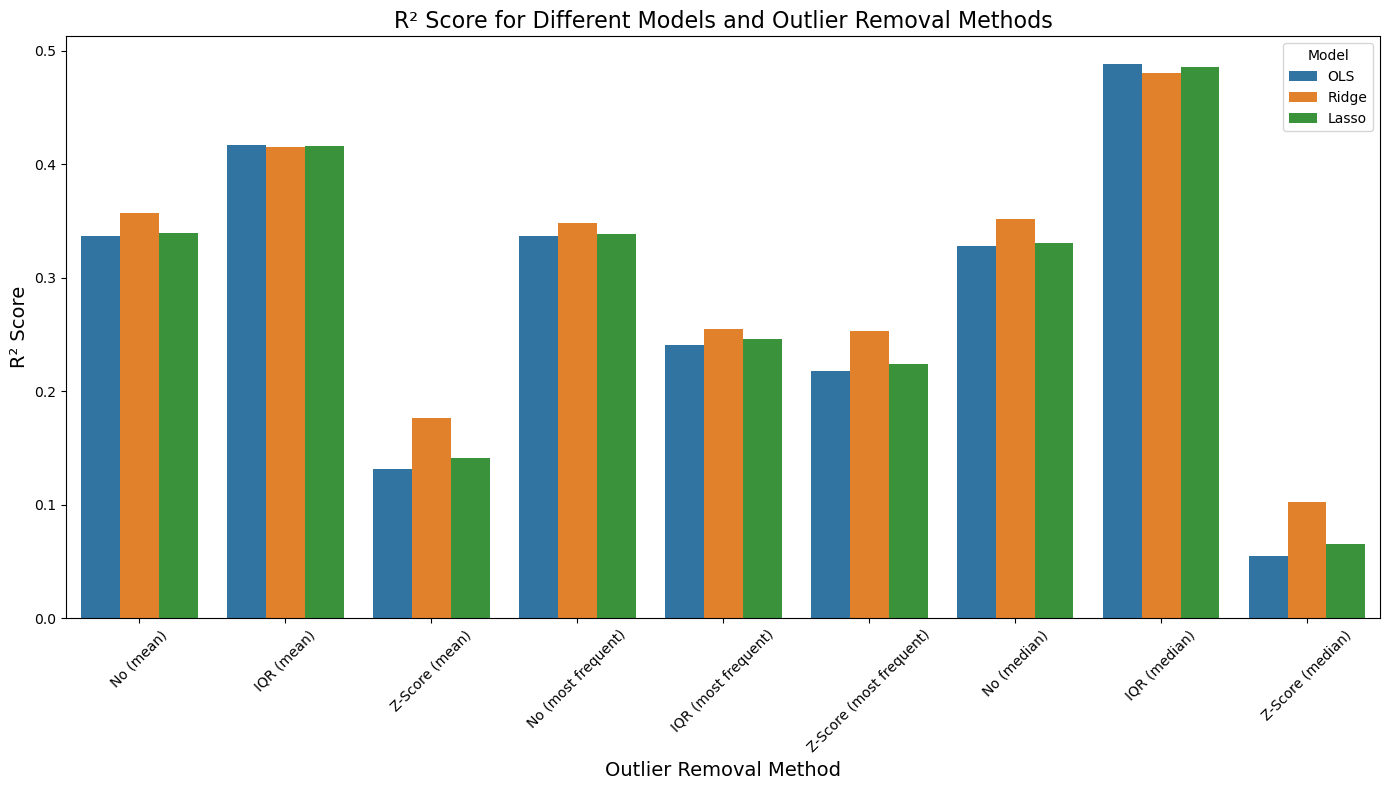

In [31]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Outliers Removed', y='R2 Score', hue='Model', data=df_r2)

plt.title('R² Score for Different Models and Outlier Removal Methods', fontsize=16)
plt.xlabel('Outlier Removal Method', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Model')

plt.tight_layout()
plt.show()

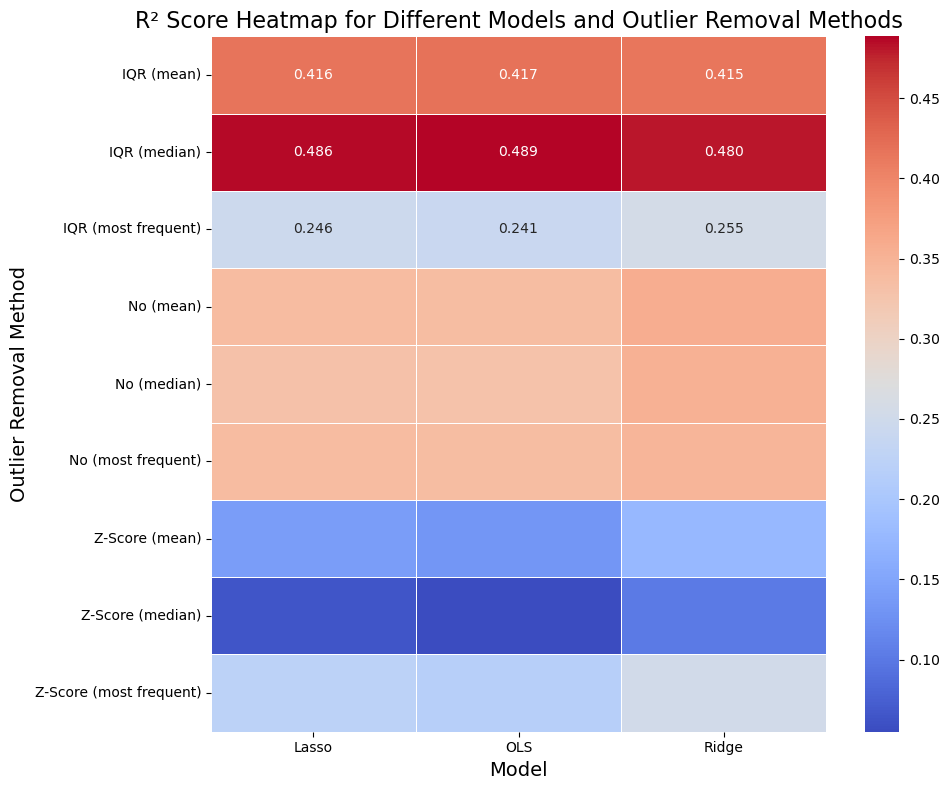

In [32]:
heatmap_data = df_r2.pivot(index='Outliers Removed', columns='Model', values='R2 Score')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f')

plt.title('R² Score Heatmap for Different Models and Outlier Removal Methods', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Outlier Removal Method', fontsize=14)

plt.tight_layout()
plt.show()